# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [ ]:
# A + B

In [ ]:
# A * B

### Dot product

In [14]:
A.shape

(2, 3)

In [15]:
B.shape

(3, 2)

In [16]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [17]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [18]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [19]:
C.shape

(6, 2)

In [20]:
A.shape

(2, 3)

In [21]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [ ]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [4]:
df = pd.read_csv('../data/banknotes.csv')

In [23]:
df.head()

variace  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0

In [24]:
df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [25]:
import seaborn as sns

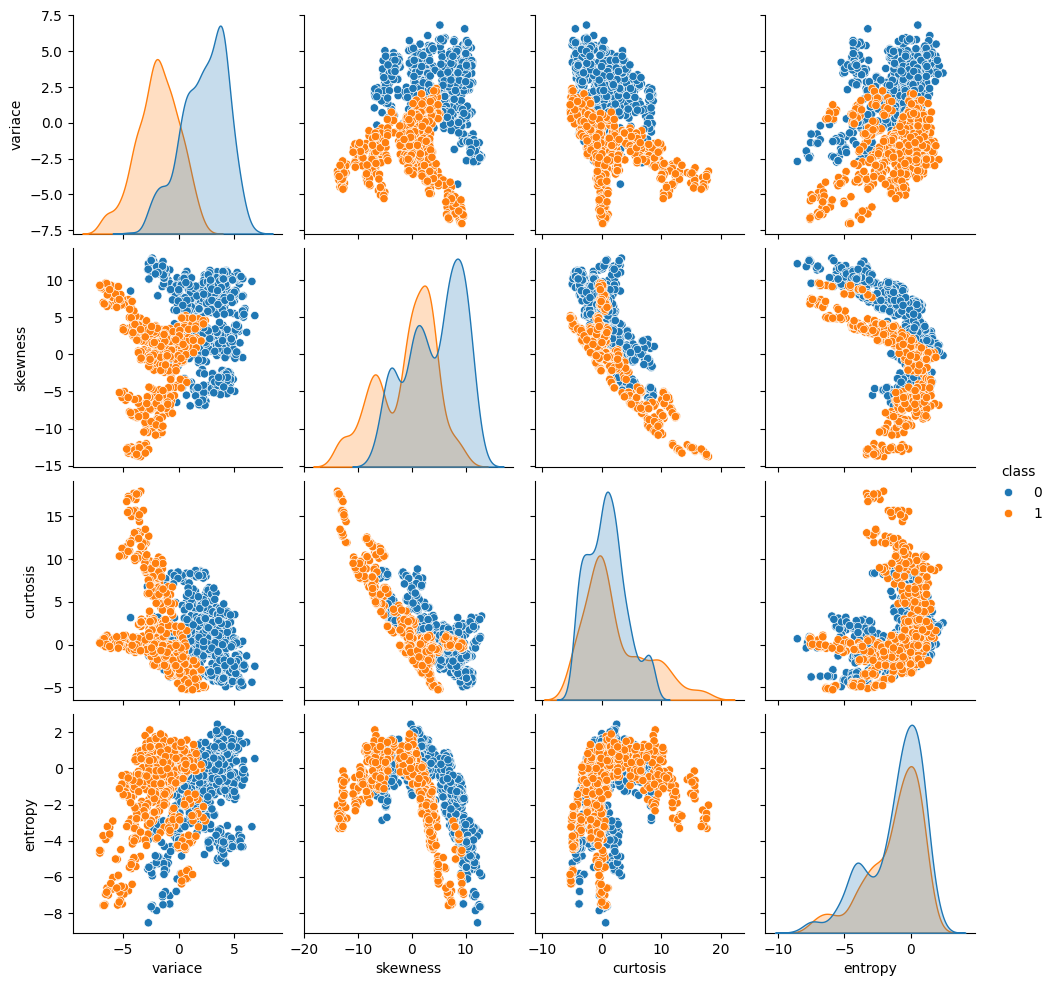

In [26]:
sns.pairplot(df, hue="class");

#### Baseline model

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [7]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [29]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99272727, 0.99636364, 0.99270073, 0.99270073, 0.99635036])

### Logistic Regression Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [3]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [32]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
30/30 [==============================] - 1s 2ms/step - loss: 0.7082 - accuracy: 0.5760
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6469
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7156
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7969
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8687
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.9115
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.9208
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.9260
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.9302
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.9292


In [33]:
historydf = pd.DataFrame(history.history, index=history.epoch)

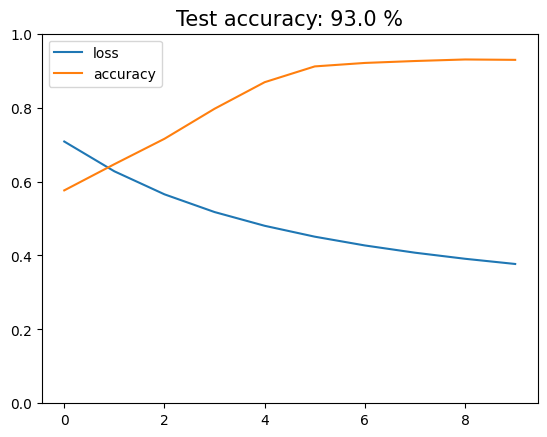

In [34]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

### Learning Rates

In [35]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [36]:
historydf = pd.concat(dflist, axis=1)

In [37]:
historydf

loss  accuracy      loss  accuracy      loss  accuracy      loss  \
0  1.163340  0.475000  0.612583  0.693750  0.512937  0.750000  0.326706   
1  0.863722  0.525000  0.404919  0.838542  0.299707  0.917708  0.131299   
2  0.654098  0.634375  0.333787  0.857292  0.227961  0.946875  0.096346   
3  0.525089  0.762500  0.289986  0.891667  0.188169  0.952083  0.081011   
4  0.449502  0.882292  0.257513  0.916667  0.162427  0.958333  0.071848   
5  0.403453  0.918750  0.232146  0.930208  0.144645  0.963542  0.065580   
6  0.372800  0.918750  0.211750  0.937500  0.131311  0.968750  0.061171   
7  0.350712  0.919792  0.195155  0.950000  0.121250  0.968750  0.057757   
8  0.333733  0.911458  0.181282  0.956250  0.113181  0.969792  0.055067   
9  0.319792  0.916667  0.169688  0.955208  0.106552  0.970833  0.052769   

   accuracy  
0  0.872917  
1  0.966667  
2  0.975000  
3  0.978125  
4  0.978125  
5  0.979167  
6  0.980208  
7  0.980208  
8  0.981250  
9  0.981250

In [38]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [39]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              1.163340  0.475000  0.612583  0.693750  0.512937  0.750000   
1              0.863722  0.525000  0.404919  0.838542  0.299707  0.917708   
2              0.654098  0.634375  0.333787  0.857292  0.227961  0.946875   
3              0.525089  0.762500  0.289986  0.891667  0.188169  0.952083   
4              0.449502  0.882292  0.257513  0.916667  0.162427  0.958333   
5              0.403453  0.918750  0.232146  0.930208  0.144645  0.963542   
6              0.372800  0.918750  0.211750  0.937500  0.131311  0.968750   
7              0.350712  0.919792  0.195155  0.950000  0.121250  0.968750   
8              0.333733  0.911458  0.181282  0.956250  0.113181  0.969792   
9              0.319792  0.916667  0.169688  0.955208  0.106552  0.970833   

learning_rate      0.50            
metric             loss  accuracy  
0              0.326706  0.872917  
1              0.131299  0.966667  
2              0.096346  0.975000  
3              0.081011  0.978125  
4              0.071848  0.978125  
5              0.065580  0.979167  
6              0.061171  0.980208  
7              0.057757  0.980208  
8              0.055067  0.981250  
9              0.052769  0.981250

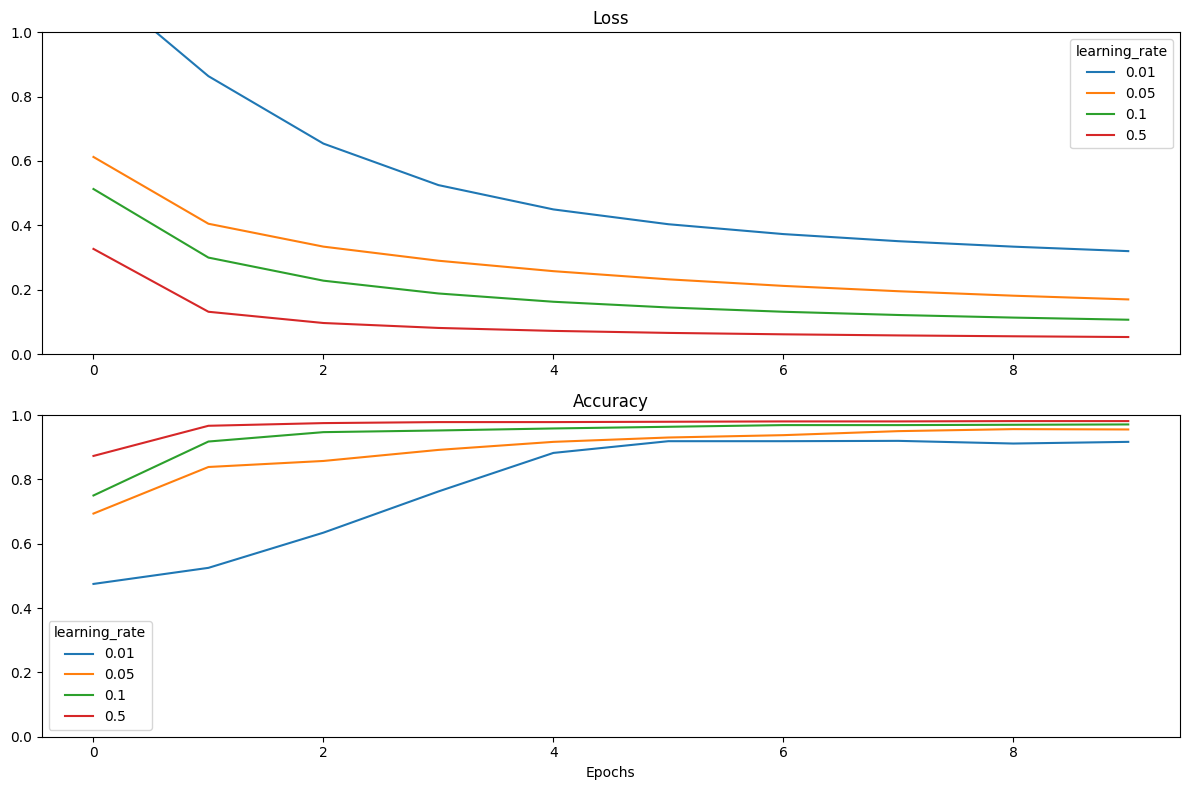

In [40]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [10]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [11]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [12]:
historydf

batch_size       16                  32                  64             \
metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.746816  0.593750  0.917963  0.479167  0.797557  0.521875   
1           0.592954  0.722917  0.828330  0.513542  0.779000  0.544792   
2           0.494364  0.809375  0.750131  0.561458  0.761394  0.555208   
3           0.430982  0.855208  0.682186  0.614583  0.744649  0.564583   
4           0.388936  0.893750  0.623549  0.665625  0.728710  0.572917   
5           0.359613  0.916667  0.573035  0.717708  0.713523  0.575000   
6           0.337875  0.930208  0.529635  0.756250  0.699044  0.583333   
7           0.320894  0.931250  0.492434  0.784375  0.685218  0.587500   
8           0.307075  0.931250  0.460475  0.816667  0.671942  0.588542   
9           0.295418  0.931250  0.433069  0.846875  0.659310  0.594792   

batch_size       128            
metric          loss  accuracy  
0           0.761835  0.564583  
1           0.743945  0.569792  
2           0.726702  0.582292  
3           0.710063  0.588542  
4           0.693967  0.596875  
5           0.678274  0.603125  
6           0.662996  0.609375  
7           0.648359  0.621875  
8           0.634080  0.630208  
9           0.620368  0.633333

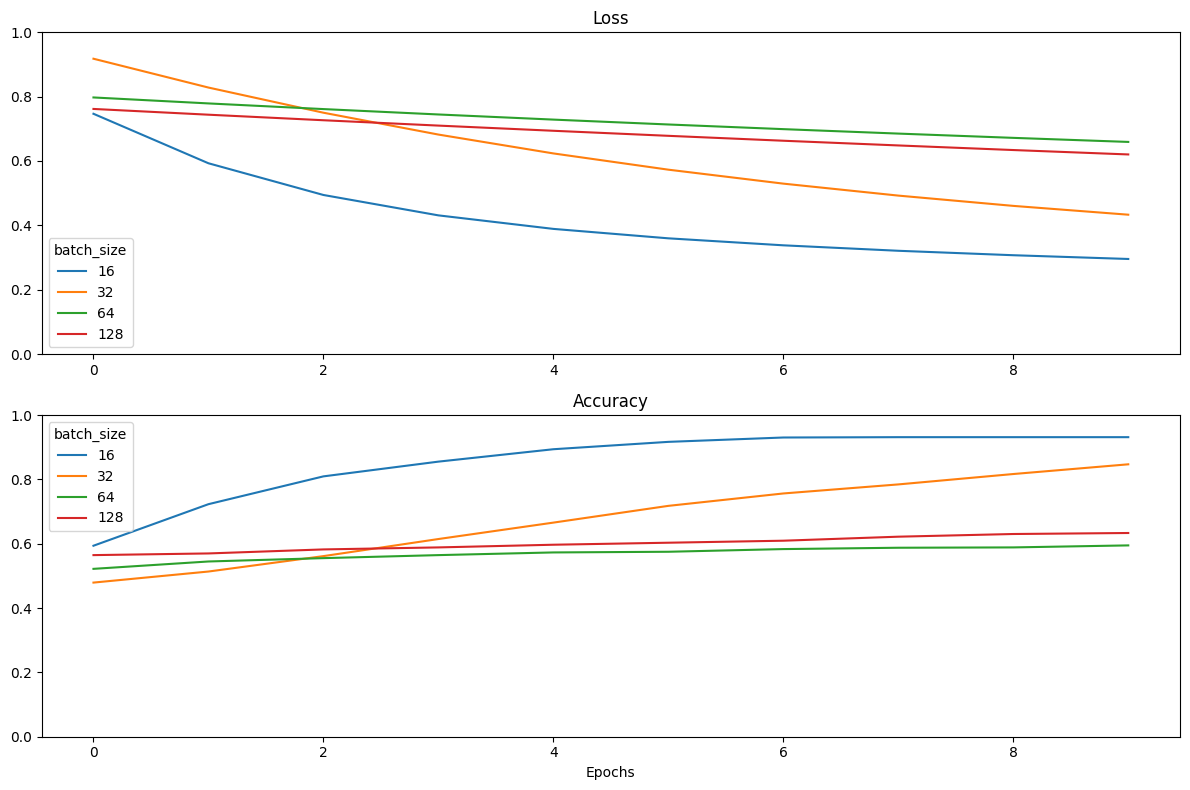

In [13]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [15]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [19]:
dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [20]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

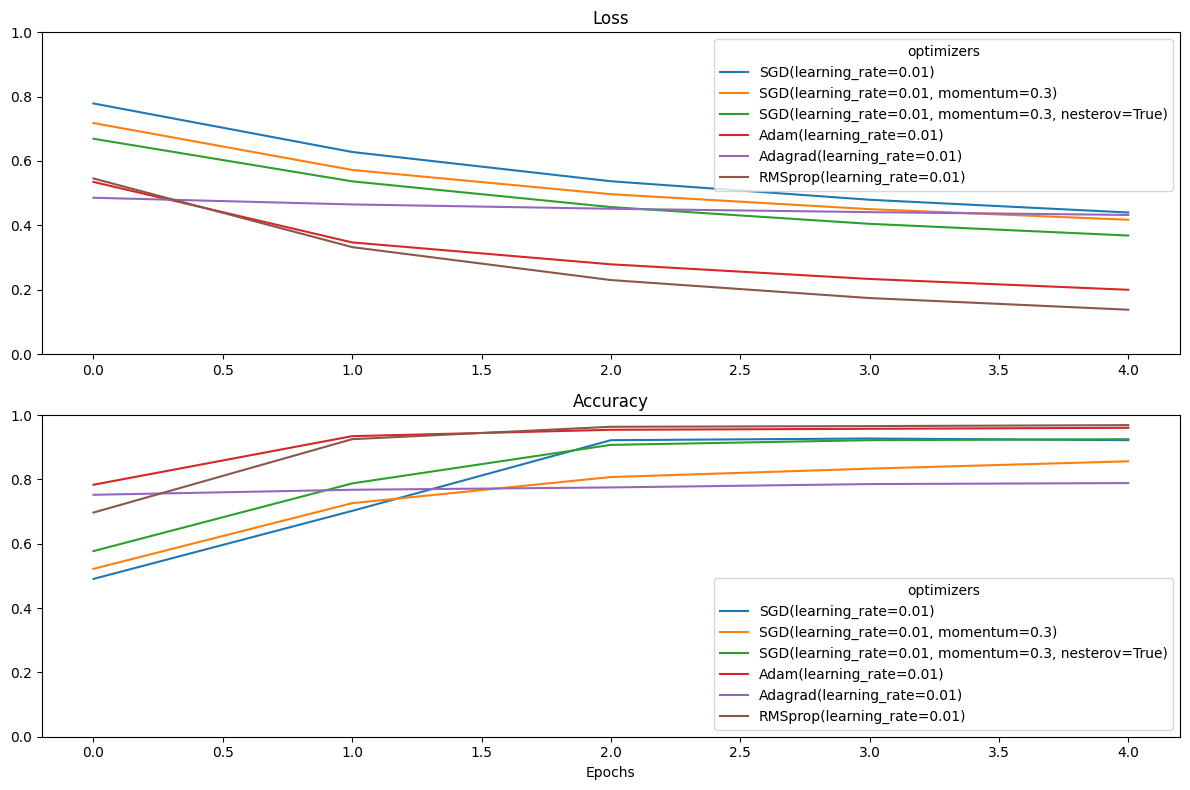

In [21]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [28]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [29]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

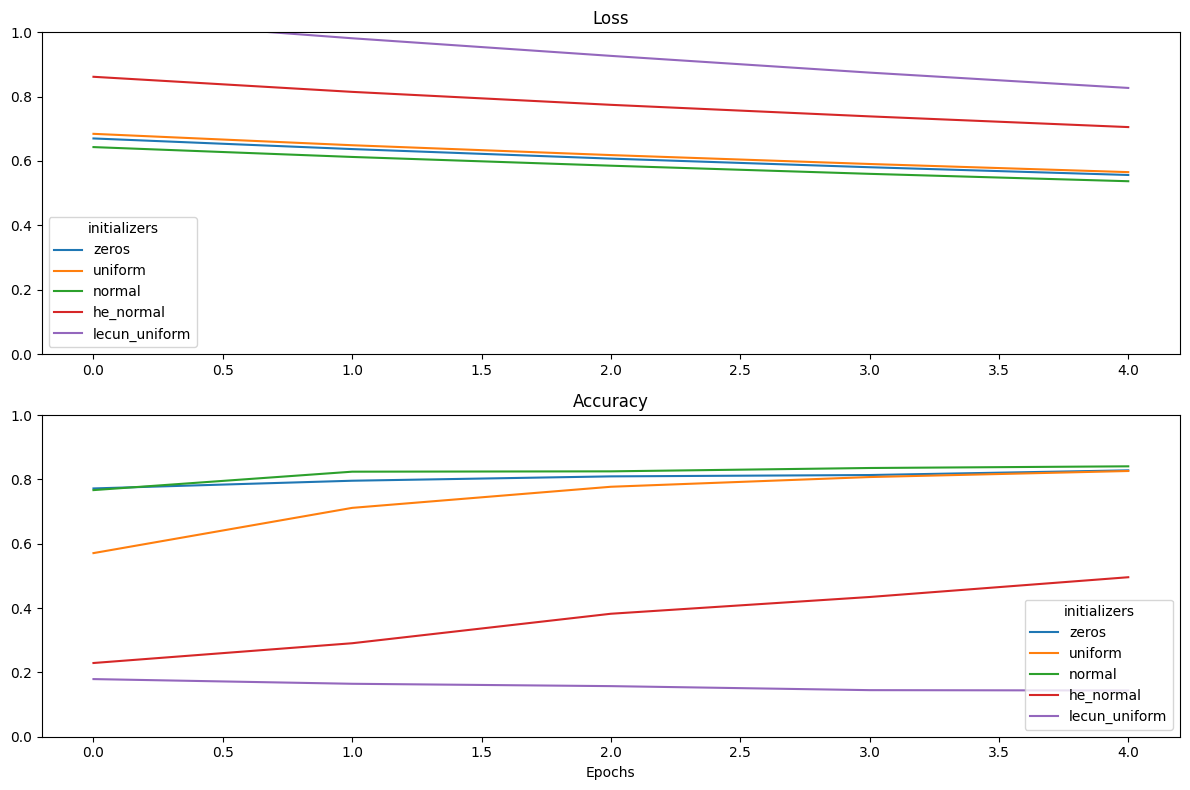

In [30]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [31]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Epoch 1/20
42/42 [==============================] - 1s 10ms/step - loss: 0.8425 - accuracy: 0.3140 - val_loss: 0.7374 - val_accuracy: 0.5174
Epoch 2/20
42/42 [==============================] - 0s 5ms/step - loss: 0.7034 - accuracy: 0.5714 - val_loss: 0.7015 - val_accuracy: 0.5174
Epoch 3/20
42/42 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.5714 - val_loss: 0.6925 - val_accuracy: 0.5174
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.5714 - val_loss: 0.6574 - val_accuracy: 0.5174
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.5714 - val_loss: 0.5586 - val_accuracy: 0.5174
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.8185 - val_loss: 0.4403 - val_accuracy: 0.8819
Epoch 7/20
42/42 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9182 - val_loss: 0.3188 - val_accuracy: 0.9514
Epoch 8/20
42/42 [=

In [32]:
result

[0.03839913383126259, 0.987864077091217]

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.layers

In [35]:
inp = model.layers[0].input
out = model.layers[0].output

In [36]:
inp

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_input')>

In [37]:
out

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [38]:
features_function = K.function([inp], [out])

In [39]:
features_function

<function keras.backend.function.<locals>.func(model_inputs)>

In [40]:
features_function([X_test])[0].shape

(412, 2)

In [41]:
features = features_function([X_test])[0]

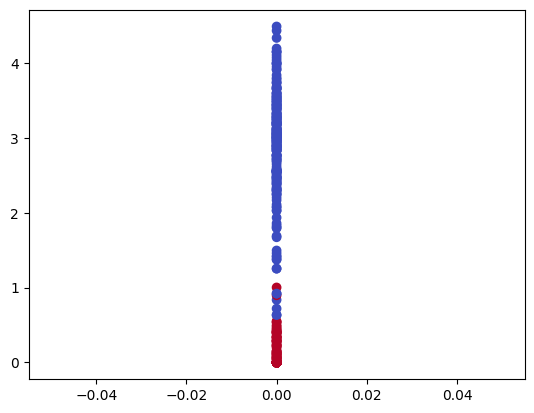

In [42]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [50]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

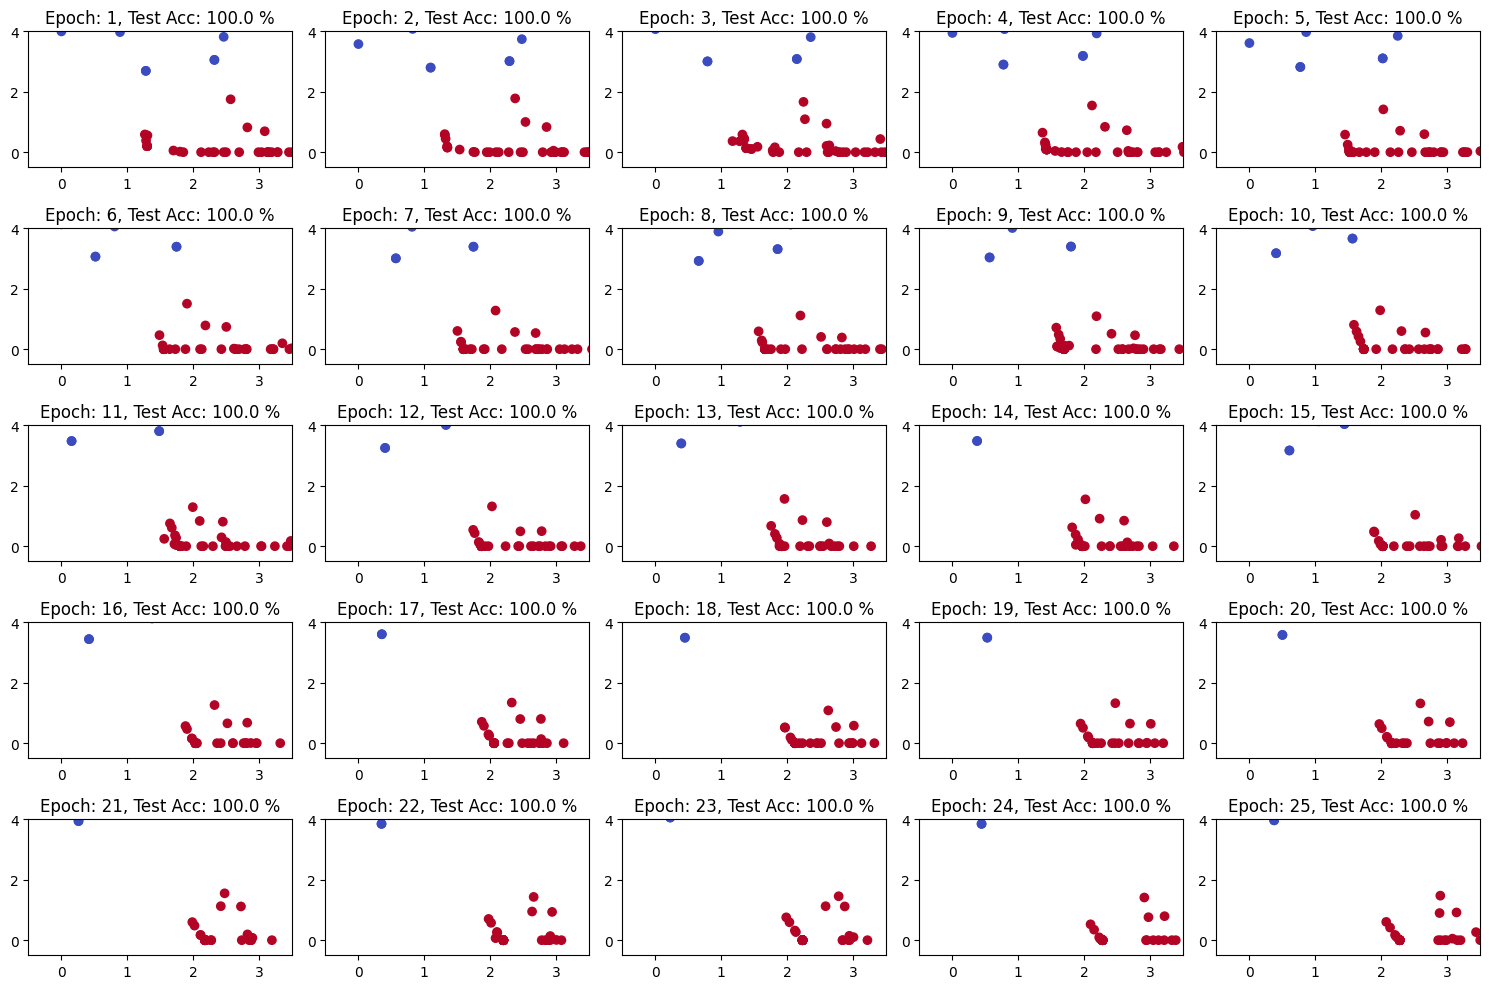

In [52]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

In [53]:
K.clear_session()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

import seaborn as sns

from sklearn.preprocessing import StandardScaler

import tensorflow.keras.backend as K

In [2]:
df = pd.read_csv('../data/wines.csv')

In [3]:
df.head()

Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280-OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280-OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [5]:
y=df['Class']

In [6]:
y.unique()

array([1, 2, 3], dtype=int64)

In [7]:
y.value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [8]:
y_cat = pd.get_dummies(y)

In [9]:
X = df.drop('Class', axis=1)

In [10]:
X.shape

(178, 13)

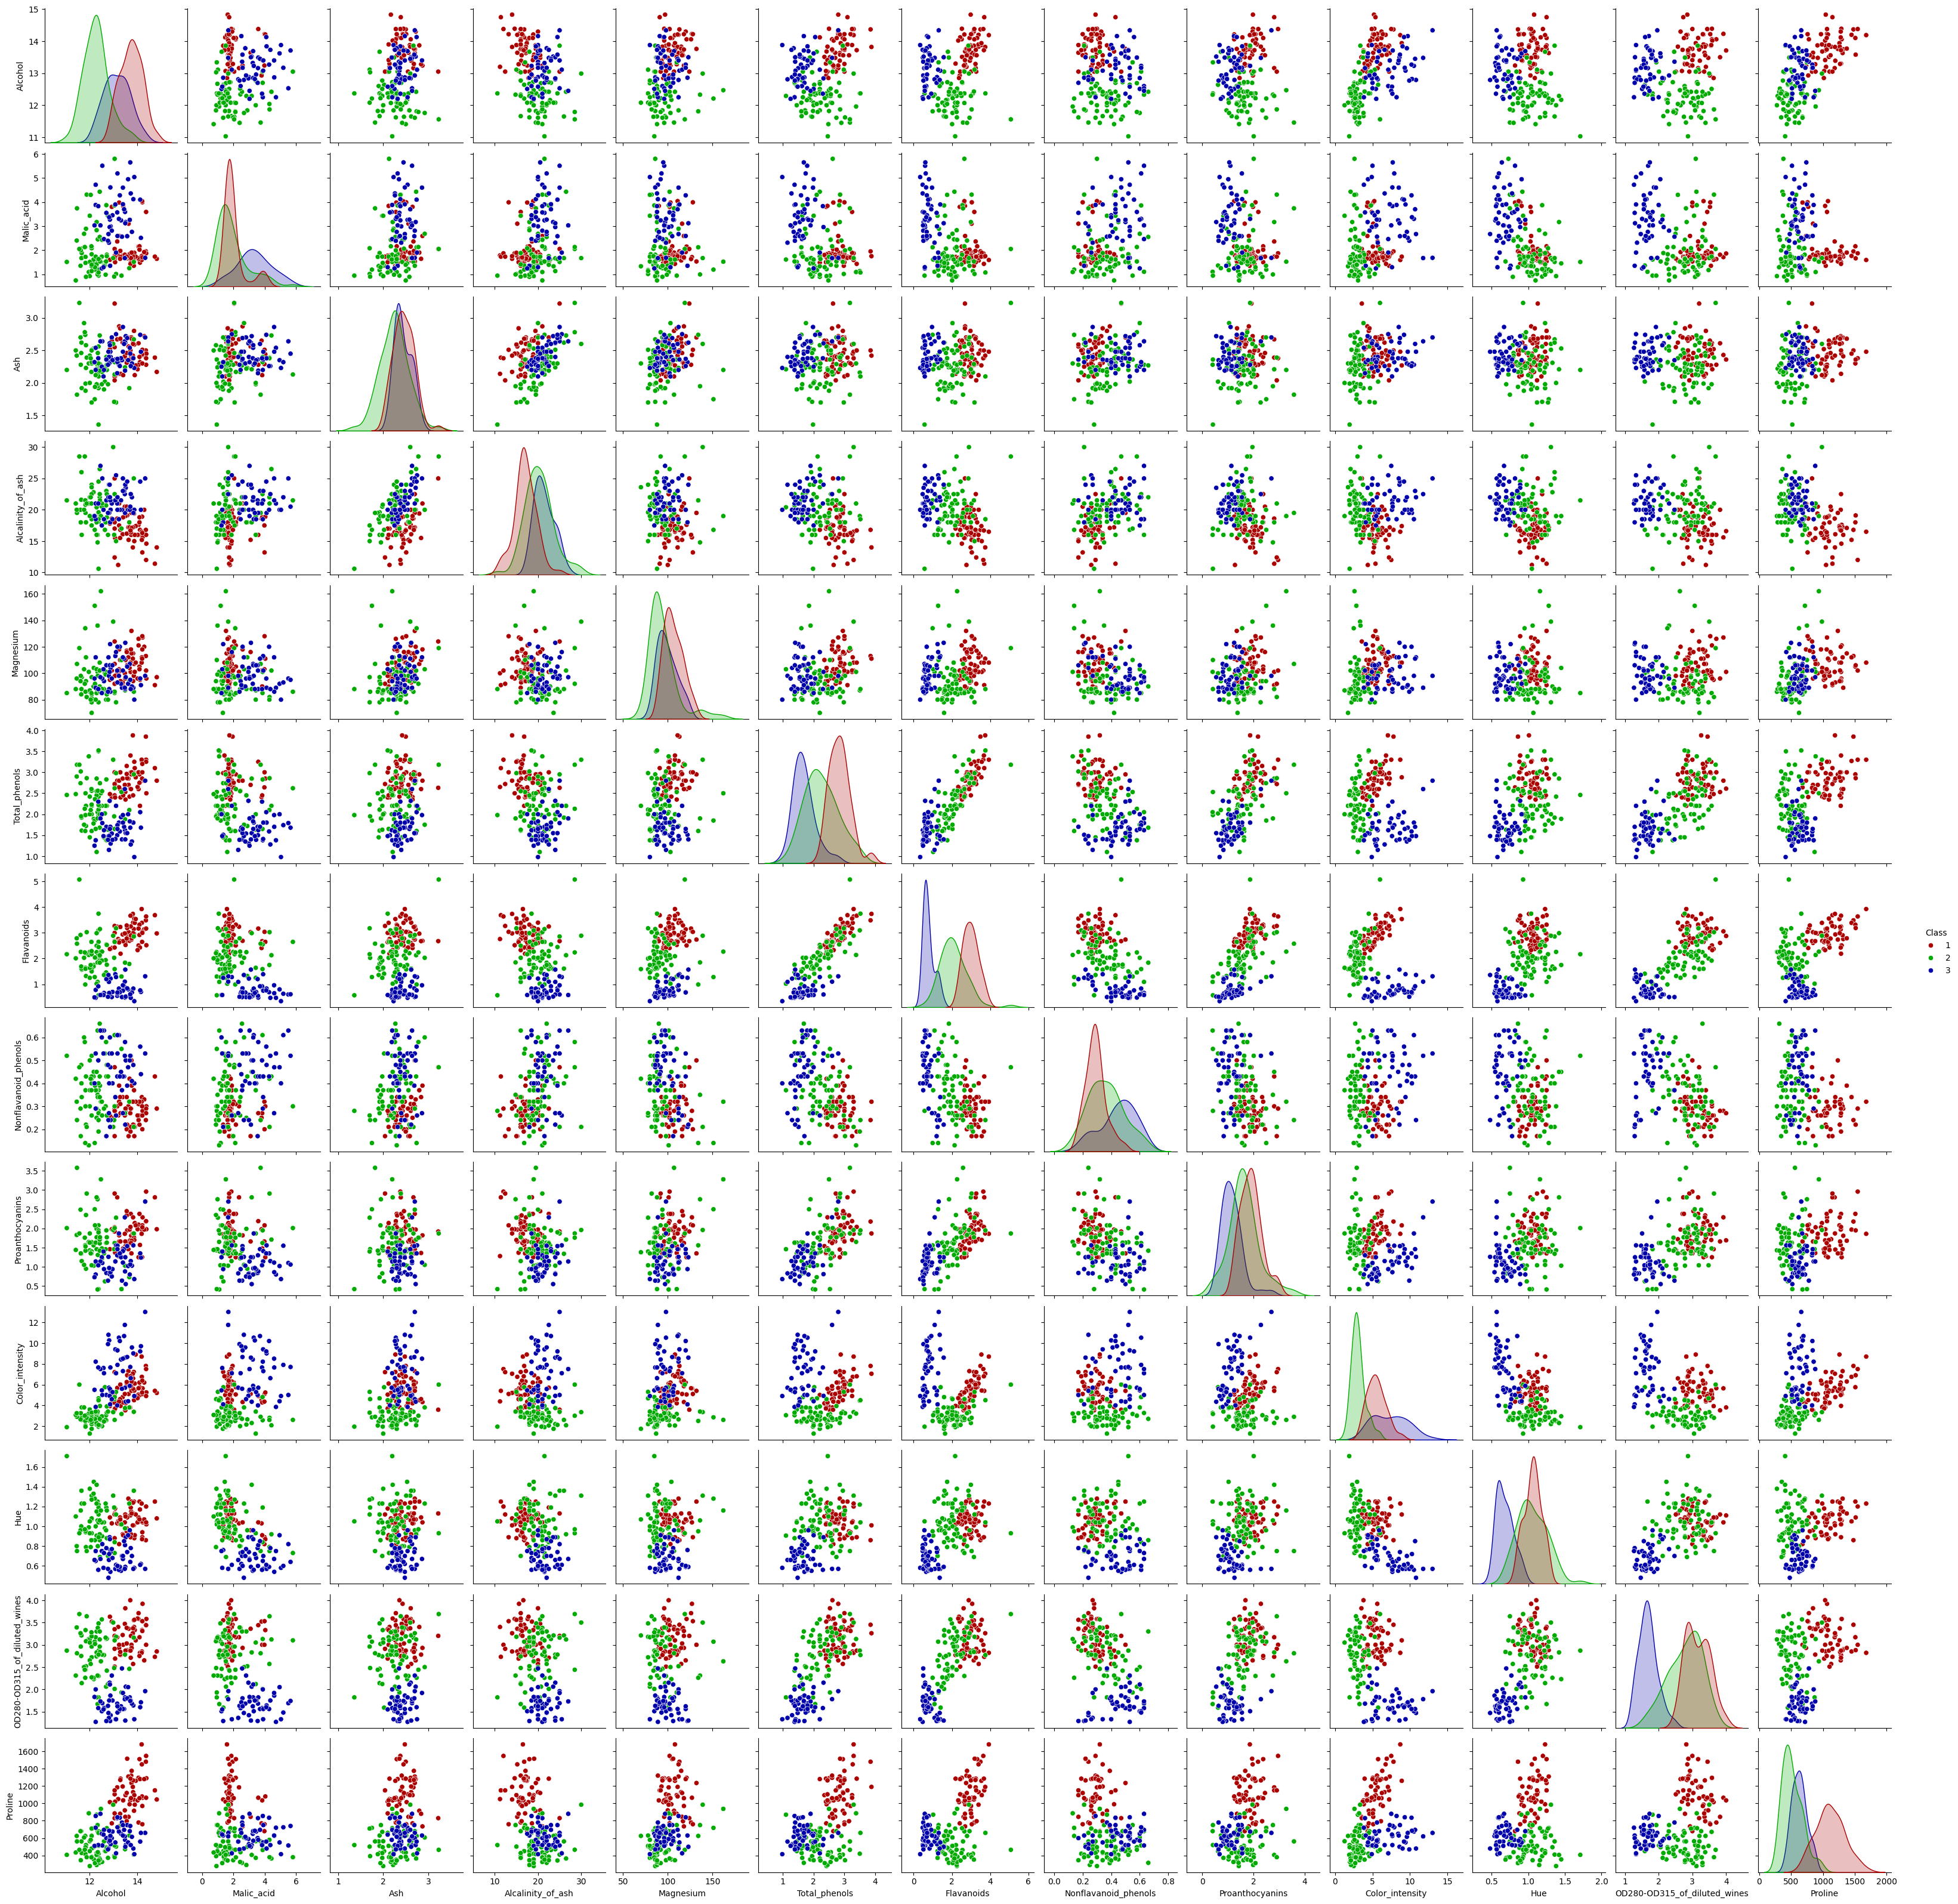

In [11]:
custom_palette = ["#AA0000", "#00AA00", "#0000AA"]

sns.pairplot(df,hue='Class', palette=custom_palette)

In [12]:
sc = StandardScaler()

In [13]:
Xsc = sc.fit_transform(X)

In [14]:
K.clear_session()

model = Sequential()
model.add(Dense(5, input_shape=(13,),
                kernel_initializer='he_normal',
                activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(learning_rate=0.1), 'categorical_crossentropy', metrics=['accuracy'])

model.fit(Xsc, y_cat.values, batch_size=8, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 1s 13ms/step - loss: 0.3250 - accuracy: 0.8873 - val_loss: 0.0595 - val_accuracy: 0.9722
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 0.1085 - accuracy: 0.9718 - val_loss: 0.0501 - val_accuracy: 0.9722
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 8.5294e-04 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 0.1461 - accuracy: 0.9507 - val_loss: 3.3533e-04 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/10


In [15]:
import sys
sys.path
#set PATH=%PATH%;C:\Program Files (x86)\Graphviz2.38\bin

['C:\\Python310\\python310.zip',
 'C:\\Python310\\DLLs',
 'C:\\Python310\\lib',
 'C:\\Python310',
 '',
 'C:\\Python310\\lib\\site-packages',
 'C:\\Python310\\lib\\site-packages\\vboxapi-1.0-py3.10.egg',
 'C:\\Python310\\lib\\site-packages\\win32',
 'C:\\Python310\\lib\\site-packages\\win32\\lib',
 'C:\\Python310\\lib\\site-packages\\Pythonwin']

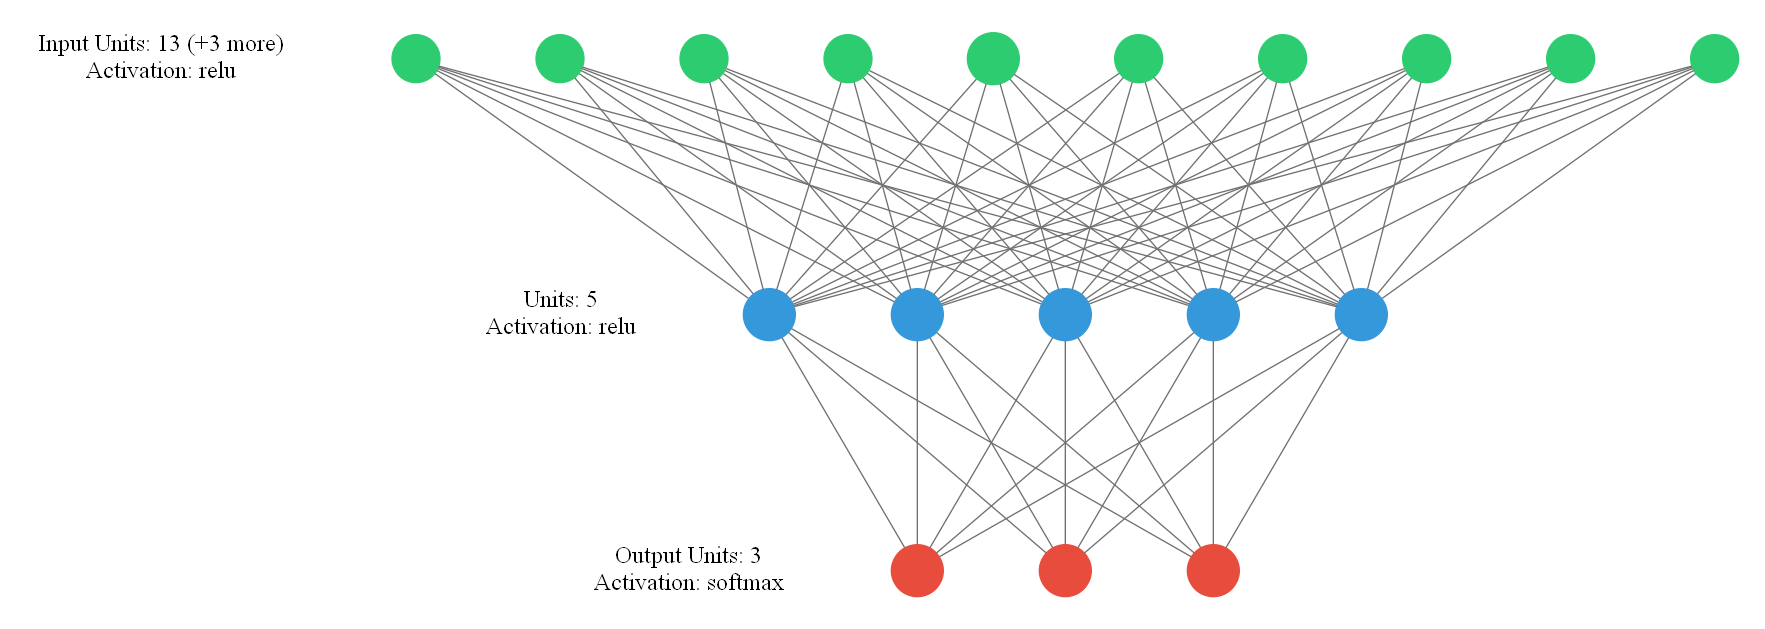

In [16]:
from keras_visualizer import visualizer

visualizer(model, file_name='model_1', file_format='png')

from IPython.display import Image
Image('model_1.png')

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [25]:
K.clear_session()
model = Sequential()
model.add(Dense(8,input_shape=(13,),
                       kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, kernel_initializer='he_normal', activation='softmax'))

model.compile(RMSprop(learning_rate=0.05), 'categorical_crossentropy', metrics=['accuracy'])

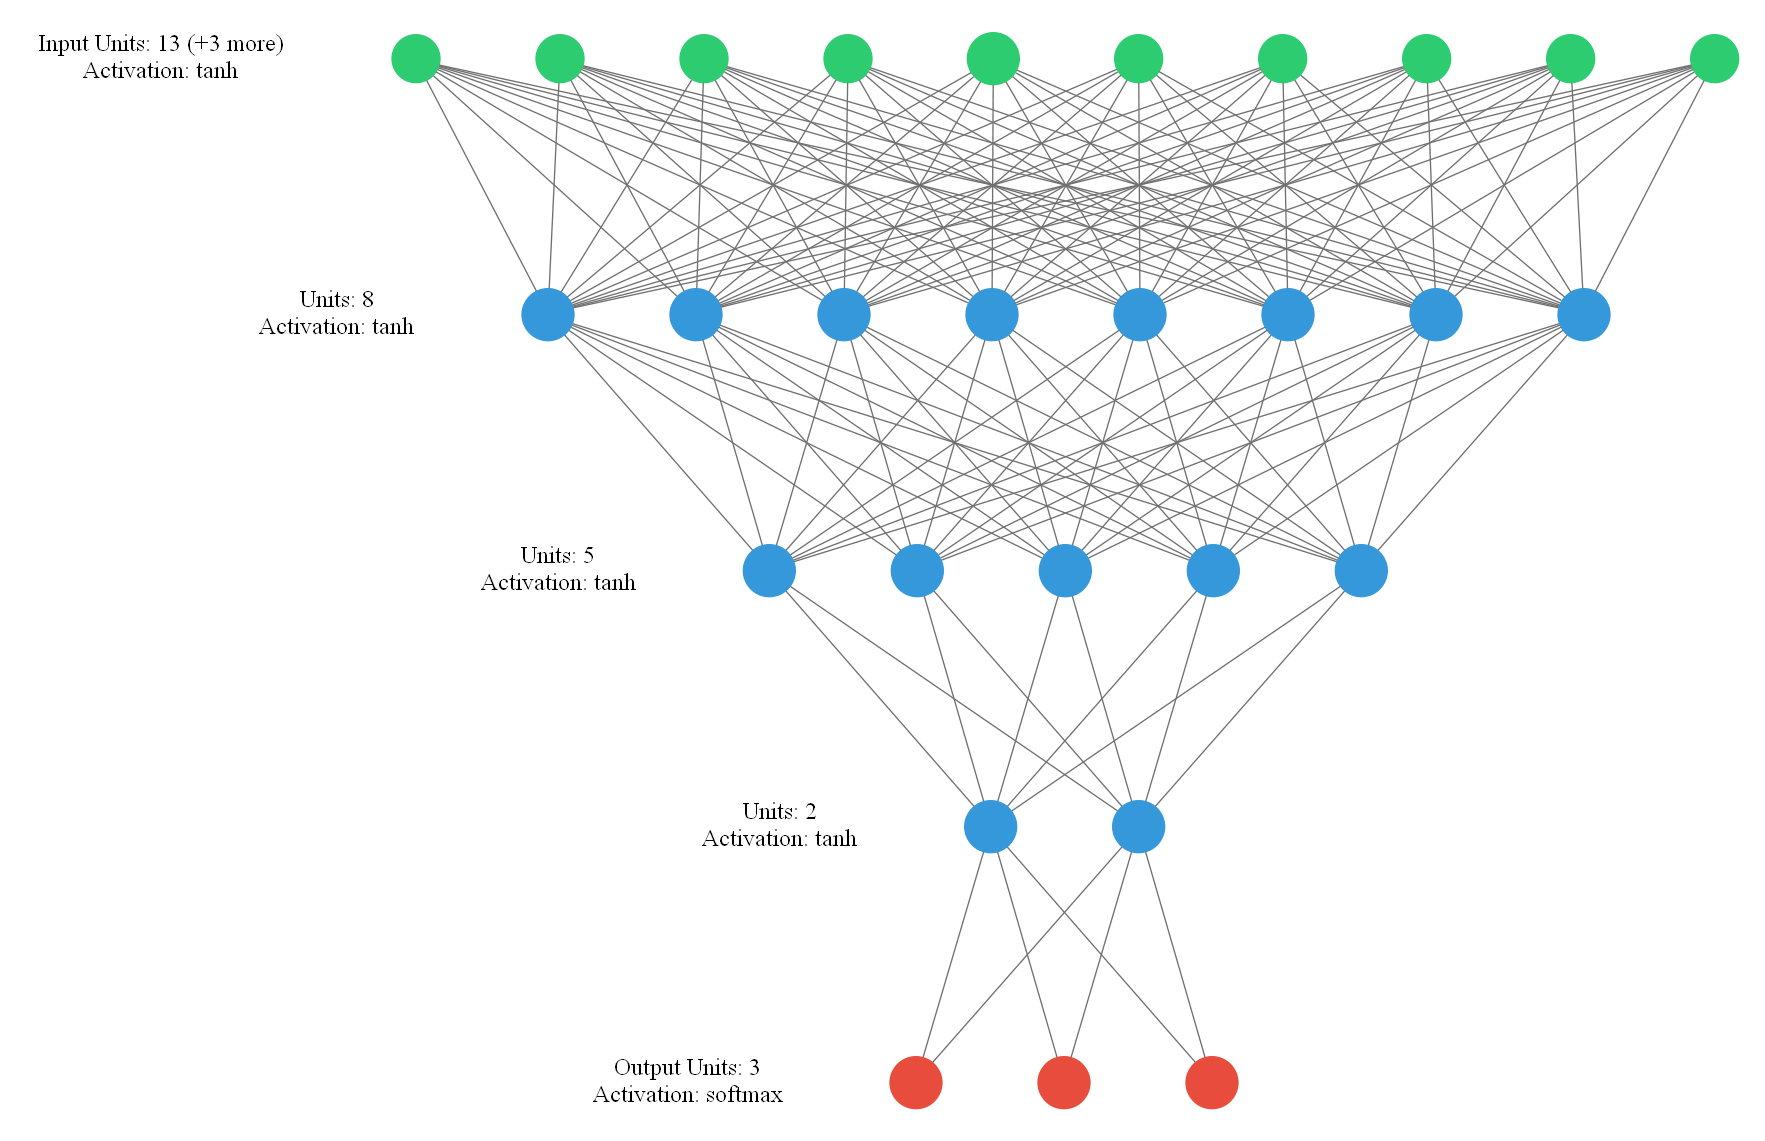

In [26]:
visualizer(model, file_name='model_2', file_format='png')

from IPython.display import Image
Image('model_2.png')

In [27]:
model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
12/12 [==============================] - 0s 7ms/step - loss: 0.4964 - accuracy: 0.8315
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 0.1811 - accuracy: 0.9719
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 0.1313 - accuracy: 0.9719
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0733 - accuracy: 0.9888
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9944
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0351 - accuracy: 0.9944
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0759 - accuracy: 0.9719
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 10/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 11/20
12/12 

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [29]:
inp=model.layers[0].input
out=model.layers[2].output

In [31]:
features_function = K.function([inp],[out])

In [33]:
features = features_function([Xsc])[0]

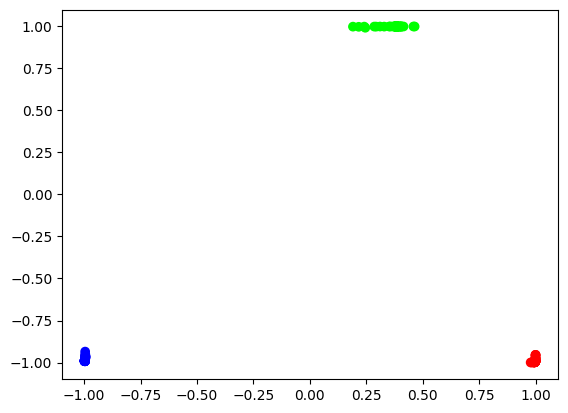

In [34]:
plt.scatter(features[:,0], features[:,1], c=y_cat)

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [35]:
from keras.layers import Input
from keras.models import Model

In [45]:
K.clear_session()

inputs = Input(shape=(13,))
x=Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x=Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)

outputs= Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(learning_rate=0.05), 'categorical_crossentropy', metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
12/12 [==============================] - 0s 5ms/step - loss: 0.5220 - accuracy: 0.8483
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1701 - accuracy: 0.9888
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1581 - accuracy: 0.9607
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0771 - accuracy: 0.9888
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0648 - accuracy: 0.9888
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1324 - accuracy: 0.9663
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0789 - accuracy: 0.9831
Epoch 8/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 9/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 11/20
12/12 [

In [46]:
features_function = K.function([inputs],[second_to_last])

In [47]:
features= features_function([Xsc])[0]

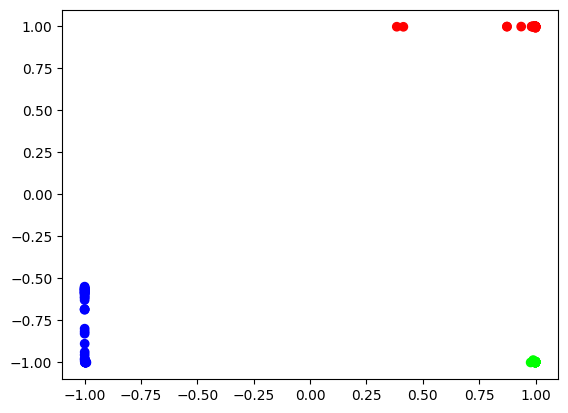

In [48]:
plt.scatter(features[:,0], features[:,1], c=y_cat)

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [50]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [51]:
checkpointer = ModelCheckpoint(filepath='../tmp/course5/weights.hdf5', verbose=1, save_best_only=True)

In [62]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=1, mode='auto')

In [56]:
tensorboard=TensorBoard(log_dir='../tmp/course5/tensorboard/')

In [57]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,test_size=0.2)

In [65]:
K.clear_session()

inputs = Input(shape=(13,))
x=Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x=Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)

outputs= Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(learning_rate=0.05), 'categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          batch_size=32,
          epochs=20,
          verbose=2,
         callbacks=[checkpointer, earlystopper, tensorboard])

Epoch 1/20

Epoch 1: val_loss did not improve from 0.01508
5/5 - 1s - loss: 0.6507 - accuracy: 0.6972 - val_loss: 0.3622 - val_accuracy: 0.9444 - 581ms/epoch - 116ms/step
Epoch 2/20

Epoch 2: val_loss did not improve from 0.01508
5/5 - 0s - loss: 0.2726 - accuracy: 0.9648 - val_loss: 0.1664 - val_accuracy: 1.0000 - 104ms/epoch - 21ms/step
Epoch 3/20

Epoch 3: val_loss did not improve from 0.01508
5/5 - 0s - loss: 0.1515 - accuracy: 0.9859 - val_loss: 0.1198 - val_accuracy: 0.9722 - 102ms/epoch - 20ms/step
Epoch 4/20

Epoch 4: val_loss did not improve from 0.01508
5/5 - 0s - loss: 0.0994 - accuracy: 0.9789 - val_loss: 0.1578 - val_accuracy: 0.9722 - 92ms/epoch - 18ms/step
Epoch 4: early stopping
